#  Pandemic Patterns - Navigating the Impact on Illinois’ Small Businesses


Github Link: https://github.com/vsrrevanth/CS418Covid19ImpactOnSmallBusinesses

## Project Introduction

The emergence of the COVID-19 pandemic has precipitated an unprecedented economic challenge, particularly for small businesses across the globe. Illinois, like many regions, has felt the weight of this crisis acutely. In response, our Data Science team has embarked on a mission to analyze and visualize the multifaceted impact of COVID-19 on small businesses within the state of Illinois. We aim to carefully gather, analyze, and visualize data to uncover vital insights revealing the challenges small businesses in Illinois are facing. Our goal is to then suggest strategies to help them become more resilient in the aftermath of the pandemic.


The impact of COVID-19 on small businesses can be seen in various aspects, such as:

Revenue: Small businesses have experienced a significant drop in revenue due to reduced consumer spending, business closures, and supply chain disruptions.

Employment: Many small businesses have been forced to lay off employees or reduce their work hours due to reduced demand for their products or services.

Financial Stability: The pandemic has created financial instability for small businesses, with many struggling to meet their expenses, pay their bills, and access loans or government support.

Data Cleaning: The U.S. Small Business Administration (SBA) and the Illinois Department of Commerce and Economic Development were two of the sources from which we gathered our data. We cleansed the data by eliminating duplicates, missing values, and outliers.

## Changes since our Initial Proposal

Our initial proposal was to analyze the impact of COVID-19 on small businesses in the United States. We made the decision to concentrate on Illinois after realizing that the dataset would be too big to evaluate in the allotted period. Our dataset now includes additional factors including the number of employees, the industry, and the location.

# Data Preparation

The data for our project was meticulously prepared to ensure accuracy and reliability in our analysis of the impact of COVID-19 on small businesses in Illinois. Here's a summary of our data preparation process:

## Initial Focus and Data Changes

- **Project Scope Adjustment**: Originally intended to cover the entire United States, the scope was refined to focus solely on Illinois due to dataset manageability concerns. This necessitated additional data considerations including business size, industry, and geographical location.

## Data Cleaning and Preparation

- **Data Sources**: We sourced our data from the U.S. Small Business Administration (SBA) and the Illinois Department of Commerce and Economic Development.
- **Cleaning Process**: The data was rigorously cleaned to remove duplicates, fill in missing values, and correct inconsistencies, ensuring the foundation of our analysis was solid and reliable.

## Analysis Readiness

- **Loan Amount Analysis**: A key component of our analysis was examining the loan amounts disbursed to small businesses across Illinois. Our prepared data allowed us to explore trends and disparities in financial support, providing critical insights into the economic impact of the pandemic on these businesses.

This preparation phase was critical in laying the groundwork for our comprehensive analysis, aiming to highlight the challenges and opportunities faced by small businesses in Illinois during the COVID-19 pandemic.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder


### PPP Loan Approval Dataset

### Dataset Overview

The dataset encompasses information regarding loans sanctioned under the Paycheck Protection Program (PPP), administered by the Small Business Administration (SBA) in response to the COVID-19 crisis. It comprises diverse fields including:

1. **Loan Details:**
   - Loan numbers
   - Loan approval dates
   - Loan status
   - Loan amounts
   - Forgiveness amount and date

2. **Borrower Information:**
   - Borrower name
   - Address (including city, state, zip code)
   - Borrower race and ethnicity
   - Number of employees
   - Business type
   - Veteran status
   - Non-profit status

3. **Lender Information:**
   - Lender name
   - Address (including city, state, zip code)

4. **Project Details:**
   - City, county, state, zip code, and congressional district
   - NAICS code (North American Industry Classification System)

5. **Loan Usage:**
   - Usage of loan proceeds

This comprehensive dataset facilitates:

- **Exploratory Data Analysis (EDA):** Understanding loan distribution, identifying trends, and assessing PPP program impact on various businesses.
  
- **Statistical Analysis and Modeling:** Utilizing data for statistical analysis, predictive modeling, and reporting to aid decision-making and policy formulation.

- **Insights into Loan Approval Process:** Analyzing factors influencing loan approval, usage patterns, and forgiveness trends.

The dataset serves as a valuable resource for stakeholders, policymakers, and analysts to gain insights into PPP program dynamics and support informed decision-making processes.


# Exploratory Data Analysis (EDA)

Our project undertakes a comprehensive EDA to unveil patterns, trends, and insights within the PPP Loan Approval Dataset. Here's a summary of our findings:

## PPP Loan Approval Dataset Overview

The dataset provides an in-depth look at loans approved under the PPP, including borrower and lender details, loan amounts, and status. This rich dataset serves as the foundation for our analysis, offering a detailed picture of the PPP's reach and impact.

## Data Initialization and Context

We delve into the PPP Loan Level Data, focusing on the $367 billion allocated to small businesses. This initial step sets the stage for our exploratory analysis, aimed at understanding the program's effectiveness and reach.



In [2]:
data = "public_150k_plus_230331.csv"
df = pd.read_csv(data)
len(df.index)
df_pandemic = pd.read_csv('National_Sate_Illinois_data.csv')

In [3]:
# remove duplicates
df = df.drop_duplicates()
df_pandemic=df_pandemic.drop_duplicates()

In [4]:
# Rename columns for clarity
df_pandemic.columns = ['state', 'instrument_id', 'question', 'answer_id', 'answer_text', 'percentage', 'se']

In [5]:
# remove any irrelevant columns
columns_to_drop = ['LoanNumber', 'SBAOfficeCode', 'ProcessingMethod', 'LoanStatusDate',
                   'Term', 'ServicingLenderLocationID',
                   'ServicingLenderAddress', 'ServicingLenderCity', 'ServicingLenderState',
                   'ServicingLenderZip', 'HubzoneIndicator',
                   'LMIIndicator', 'UTILITIES_PROCEED', 'PAYROLL_PROCEED', 'MORTGAGE_INTEREST_PROCEED',
                   'RENT_PROCEED', 'REFINANCE_EIDL_PROCEED', 'HEALTH_CARE_PROCEED',
                   'DEBT_INTEREST_PROCEED']
df = df.drop(columns=columns_to_drop)

In [6]:
df['DateApproved'] = pd.to_datetime(df['DateApproved'])
df['ForgivenessDate'] = pd.to_datetime(df['ForgivenessDate'])

In [7]:
df_illinois = df[df['BorrowerState'] == 'IL']

In [8]:
df = df.reset_index(drop=True)

# Exploratory Data Analysis

In this section, we dive into the exploratory data analysis to understand the characteristics and trends within our dataset. Through various visualizations, we aim to uncover patterns, anomalies, and relationships in the data related to the impact of COVID-19 on small businesses in Illinois. Here are seven visualizations that reveal interesting hypotheses about our data:

## Visualization 1: Impact of COVID-19 on Small Business Revenue -- by Rashmika Nattam


This visualization presents the impact of COVID-19 on small business owners from 2020 to 2022, showcasing the percentage of businesses that experienced varying degrees of negative or positive effects due to the pandemic. Categories range from "Large negative effect" to "Large positive effect."

The bar chart is designed to offer a clear view of how small businesses in Illinois were impacted in terms of revenue and operational changes.


answer_id
1    0.273736
2    0.456472
3    0.205847
4    0.060066
5    0.014750
Name: percentage, dtype: float64


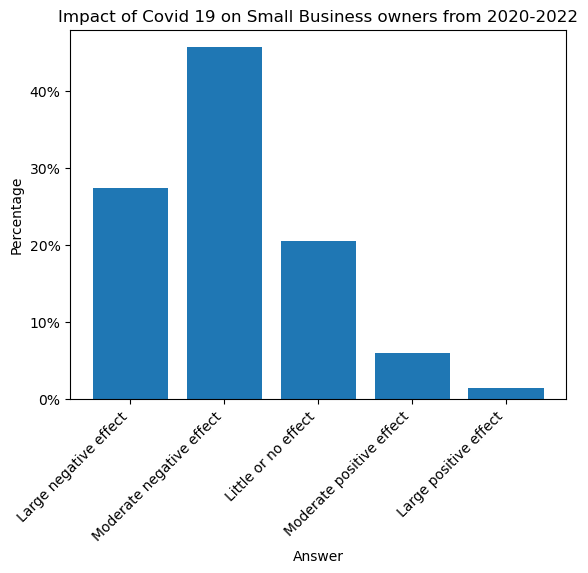

In [9]:
df_filtered = df_pandemic[df_pandemic['instrument_id'] == 2].copy()


df_filtered['percentage'] = df_filtered['percentage'].str.rstrip('%').astype('float') / 100.0
# Extract required columns
averages = df_filtered.groupby('answer_id')['percentage'].mean()

fig, ax = plt.subplots()
ax.set_title("Impact of Covid 19 on Small Business owners from 2020-2022")
ax.bar(averages.index, averages.values)
ax.set_xticks(averages.index)
ax.set_xticklabels(['Large negative effect', 'Moderate negative effect', 'Little or no effect', 'Moderate positive effect','Large positive effect'],rotation=45, ha='right')
ax.set_ylabel('Percentage')
ax.set_xlabel('Answer')

def percent(x, pos):
    return '{:.0%}'.format(x)

yticks = mtick.FuncFormatter(percent)
ax.yaxis.set_major_formatter(yticks)

print(averages)
plt.show()


Similarly, this pie chart illustrates the impact of COVID-19 on small business owners, categorized by the severity of the effect (from "Large negative effect" to "Large positive effect") in a different visual format.
This visualization serves to provide a proportional representation of the various impacts on small businesses, giving an intuitive understanding of the pandemic's widespread effects.

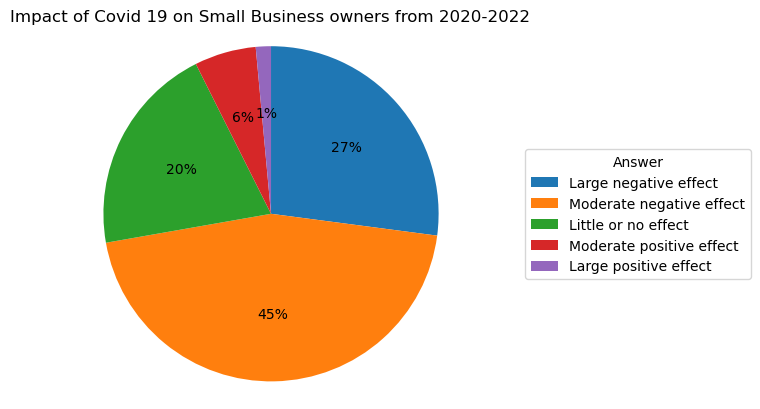

In [10]:
fig, ax = plt.subplots()
ax.set_title("Impact of Covid 19 on Small Business owners from 2020-2022")

# Plot the pie chart
wedges, texts, autotexts = ax.pie(averages.values, autopct='%.0f%%', startangle=90, counterclock=False)

# Create legend labels
legend_labels = ['Large negative effect', 'Moderate negative effect', 'Little or no effect', 'Moderate positive effect', 'Large positive effect']

# Set legend
ax.legend(wedges, legend_labels, title="Answer", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

plt.show()


## Visualization 2: Distribution of Jobs Reported by Business Age -- by Rohan Karle Sudarshan

This plot can depict, particularly how different business ages may correlate with employment levels during the pandemic period

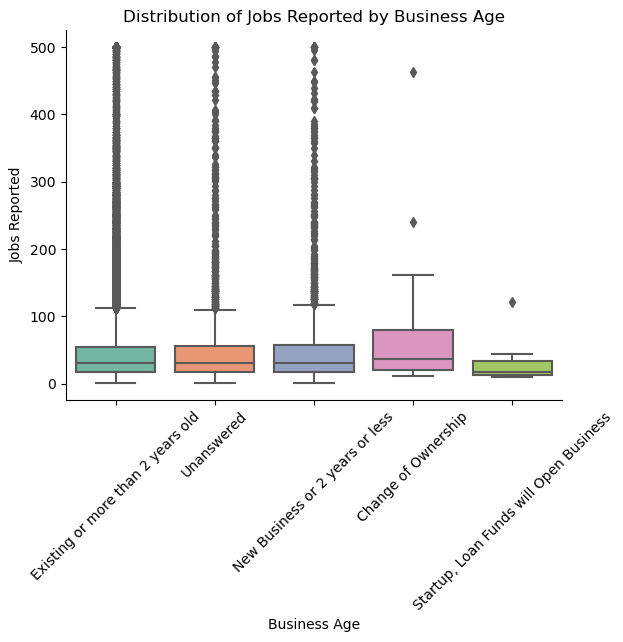

In [11]:
sns.boxplot(data=df, x='BusinessAgeDescription', y='JobsReported', palette='Set2')
plt.title('Distribution of Jobs Reported by Business Age')
plt.xlabel('Business Age')
plt.ylabel('Jobs Reported')
plt.xticks(rotation=45)
sns.despine()
plt.show()

## Visualization 3: Loan Distribution Heat Map in Illinois -- by Revanth Varanasi

This heat map illustrates the distribution of loan approvals across Illinois counties, with darker red shades signifying higher loan amounts. It visually emphasizes regions with greater financial support, aiding in identifying investment opportunities and assessing economic activity. County names and borders are also depicted, offering geographic insights into the loan distribution pattern.


<Figure size 640x480 with 0 Axes>

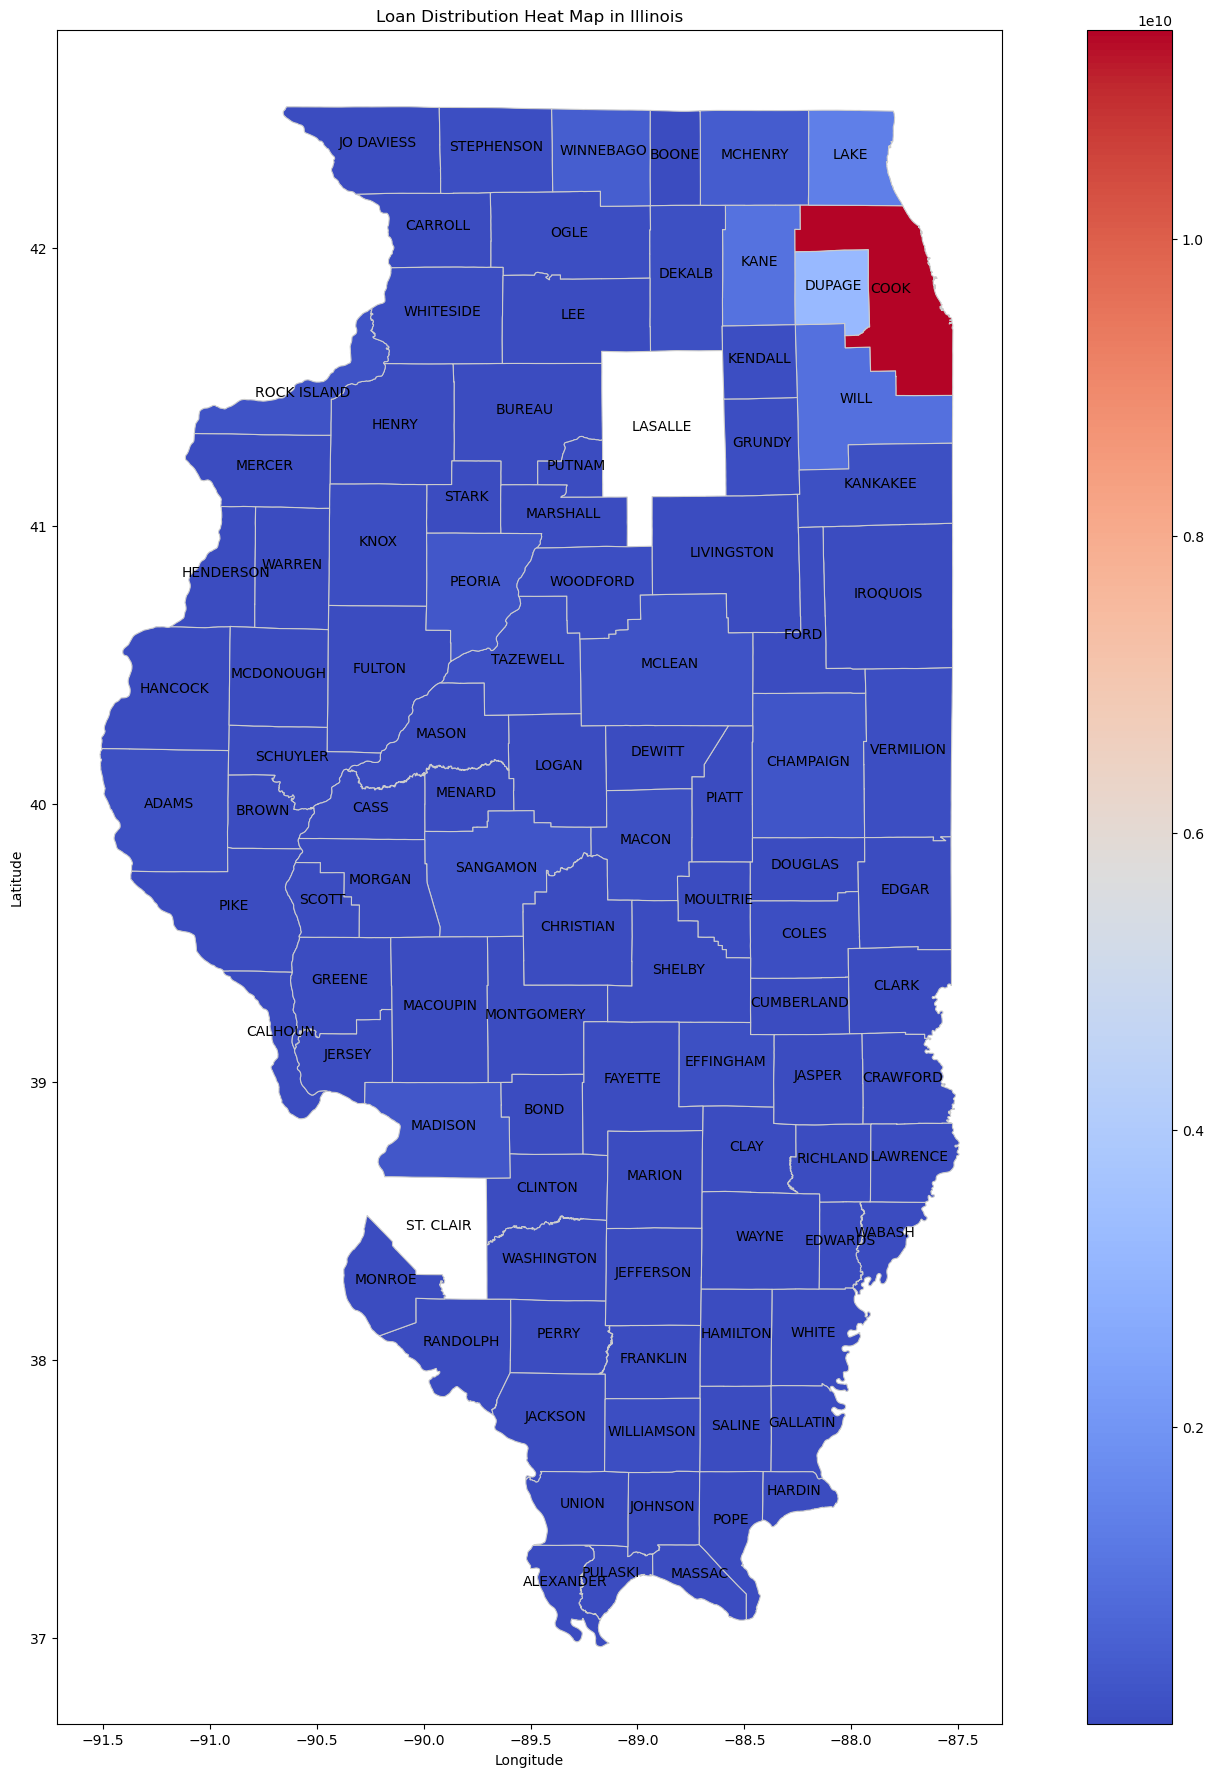

In [12]:
import fiona
import geopandas as gpd
import matplotlib.pyplot as plt

# Set 'SHAPE_RESTORE_SHX' config option to 'YES'
fiona.drvsupport.supported_drivers['ESRI Shapefile'] = 'r'
fiona.drvsupport.supported_drivers['ESRI Shapefile'] = 'rw'

# Load the Illinois shapefile
illinois_map = gpd.read_file('IL_BNDY_County/IL_BNDY_County_Py.shp')

# Group by project county and calculate the sum of loan amounts
county_loan_sum = df_illinois.groupby('ProjectCountyName')['CurrentApprovalAmount'].sum().reset_index()

# Merge the loan sum data with the Illinois shapefile
illinois_map = illinois_map.merge(county_loan_sum, left_on='COUNTY_NAM', right_on='ProjectCountyName', how='left')

# Clear the previous plot
plt.clf()

# Create a figure and axis with larger size
fig, ax = plt.subplots(figsize=(22, 22))

# Plot the Illinois map with a heat map of loan distribution and county borders
illinois_map.plot(column='CurrentApprovalAmount', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Plot county names
illinois_map.apply(lambda x: ax.annotate(text=x.COUNTY_NAM, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

# Set axis labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Loan Distribution Heat Map in Illinois')

# Show the plot
plt.show()



## Visualization 4: Exploring the Correlation between Loan and Forgiveness Amounts -- by Chandhu Bhumireddy

The scatter plot illustrates the correlation between loan and forgiveness amounts within a dataset, offering insights into their relationship, including linear or non-linear tendencies and outliers. Analyzing this plot aids in understanding the dynamics between loan sizes and forgiveness, highlighting trends and anomalies. This visualization is instrumental for data-driven decision-making, facilitating the evaluation of loan forgiveness trends and identifying atypical loans.

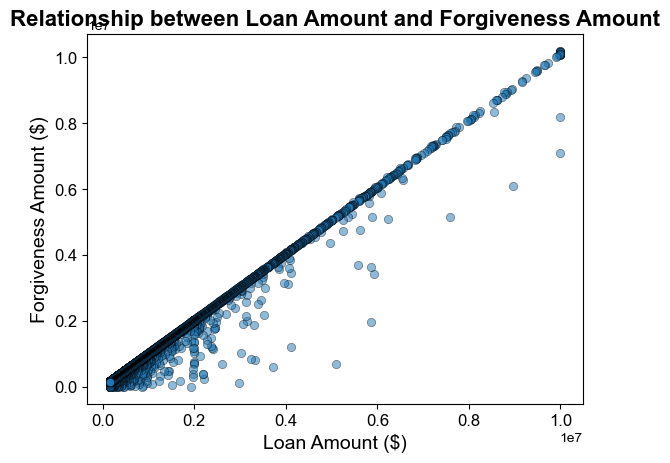

In [13]:
# Create scatter plot
sns.scatterplot(data=df, x='CurrentApprovalAmount', y='ForgivenessAmount', alpha=0.5, edgecolor='black')

# Set title and axis labels
plt.title('Relationship between Loan Amount and Forgiveness Amount', fontsize=16, fontweight='bold')
plt.xlabel('Loan Amount ($)', fontsize=14)
plt.ylabel('Forgiveness Amount ($)', fontsize=14)

# Customize plot aesthetics
sns.set_style('whitegrid')  # Set seaborn style
plt.rcParams['figure.figsize'] = (10, 6)  # Set figure size
plt.xticks(fontsize=12)  # Set x-axis tick label font size
plt.yticks(fontsize=12)  # Set y-axis tick label font size

# Show the plot
plt.show()

## Visualization 5: Analyzing Loan amount and Loan status patterns -- by Guna Shree Channakeshava

This histogram depicts the variance in loan amounts across a dataset, showcasing the frequency of various loan sizes. Such analysis uncovers trends, patterns, and potential outliers within the distribution, aiding in informed decision-making and offering a deeper understanding of the loan data's dynamics.

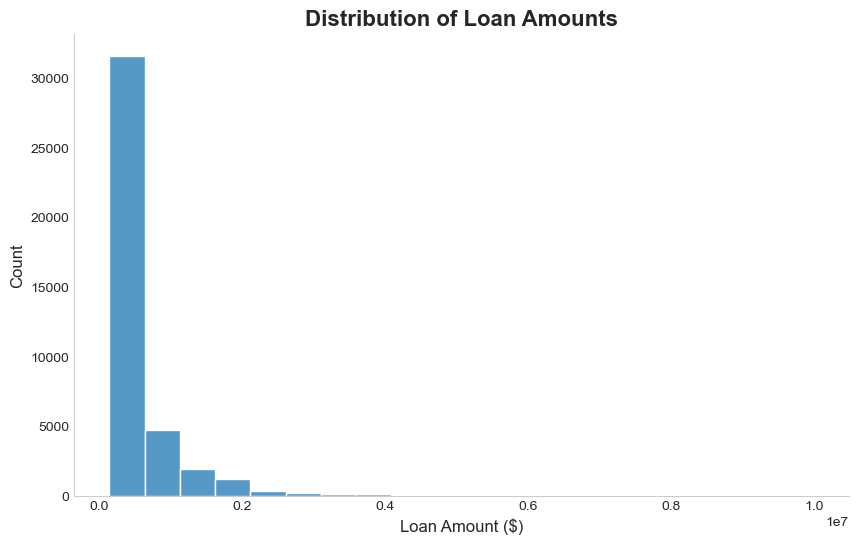

In [14]:
# Create histogram plot
sns.histplot(data=df, x='CurrentApprovalAmount', bins=20)

# Set plot title, x-axis label, and y-axis label
plt.title('Distribution of Loan Amounts', fontsize=16, fontweight='bold')
plt.xlabel('Loan Amount ($)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Customize plot aesthetics
sns.set_style("whitegrid") # Set the background style to whitegrid
sns.despine() # Remove spines
plt.tick_params(axis='both', which='both', length=0) # Remove ticks
plt.grid(visible=False) # Hide grid lines

# Show plot
plt.show()

### Distribution of Loan Status 

The below plot titled "Distribution of Loan Status" is a countplot that provides a visual representation of the frequency or count of different loan status categories in the dataset. It is useful for gaining insights into the loan portfolio, evaluating loan performance, monitoring changes over time, and communicating findings to stakeholders. The plot allows for quick identification of trends, imbalances, and risks related to loan status, making it a valuable tool for data analysis and decision-making in the context of loan data.

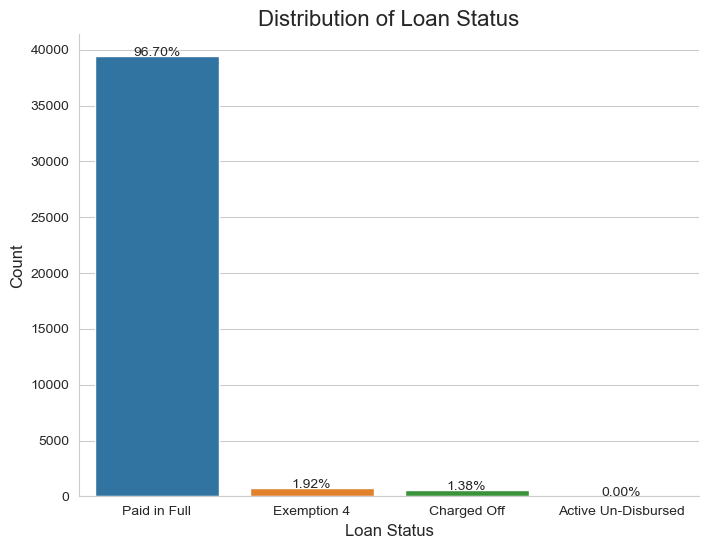

In [15]:
# Set plot style
sns.set_style("whitegrid")

# Create countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='LoanStatus')
ax.set_title('Distribution of Loan Status', fontsize=16)
ax.set_xlabel('Loan Status', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Customize plot aesthetics
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add value labels to bars
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline', fontsize=10)

plt.show()

## Visualization 6: Urban vs. Rural Distribution Analysis -- by Ishwa Tushar Shah

This pie chart illustrates the urban and rural categorizations within the dataset, offering a straightforward comparison of their proportions through a visually engaging pastel palette and a clear legend. This visualization aids in quickly grasping the balance between urban and rural indicators, facilitating an understanding of geographic distribution patterns essential for strategic planning and insight generation.


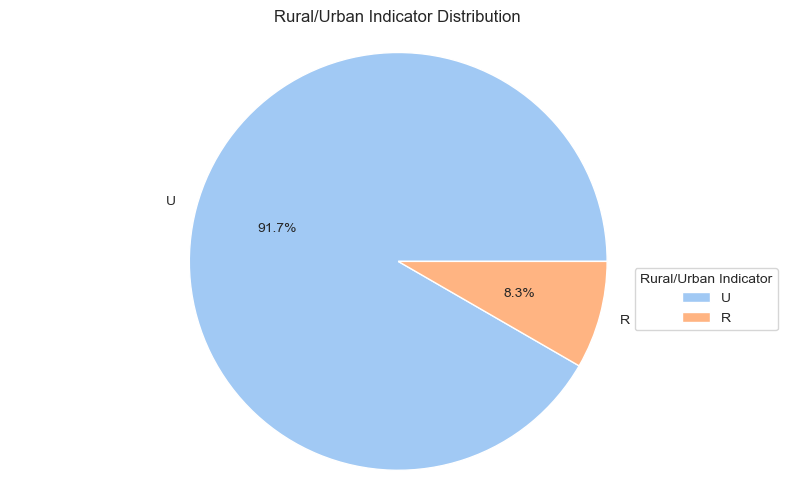

In [16]:
# Create a pie chart for rural/urban indicator
rural_urban_counts = df['RuralUrbanIndicator'].value_counts()

# Set color palette
colors = sns.color_palette('pastel')

# Create pie chart with improved visual appearance
plt.pie(rural_urban_counts, labels=rural_urban_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Rural/Urban Indicator Distribution')
plt.axis('equal')  # Ensure the pie chart is drawn as a circle

# Add legend
plt.legend(title='Rural/Urban Indicator', loc='best', bbox_to_anchor=(1, 0.5))

# Show plot
plt.show()

## Visualization 7: Average Loan Amounts Across Loan Statuses with Error Bars -- by Ishwa Tushar Shah


The plot elucidates the correlation between loan status and average loan amounts, augmented with error bars to highlight the range of variability. By delineating mean loan amounts by status and incorporating standard deviation, it reveals the financial dynamics associated with each loan status. The visualization's error bars underscore the spread and uncertainty of these averages, offering a nuanced view of financial variances across statuses. This analysis is pivotal for discerning financial trends and guiding decisions in loan management and policy formulation.

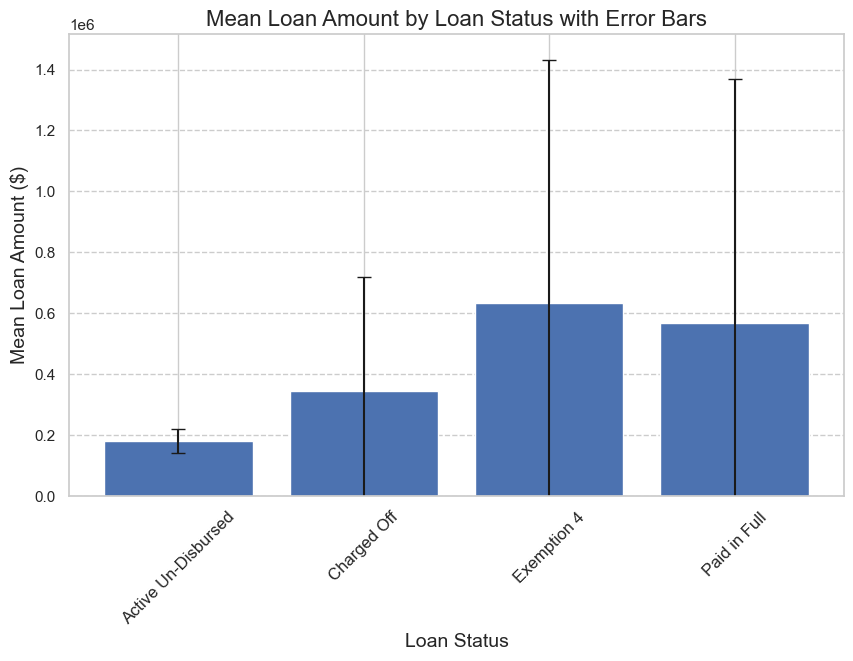

In [18]:
# Calculate mean and standard deviation of loan amount by loan status
mean_loan_amount = df.groupby('LoanStatus')['CurrentApprovalAmount'].mean()
std_loan_amount = df.groupby('LoanStatus')['CurrentApprovalAmount'].std()

# Set Seaborn style
sns.set(style='whitegrid')

# Create bar plot with error bars
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(mean_loan_amount.index, mean_loan_amount.values, yerr=std_loan_amount.values, capsize=5)

# Set labels and title
plt.title('Mean Loan Amount by Loan Status with Error Bars', fontsize=16)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Mean Loan Amount ($)', fontsize=14)
plt.xticks(fontsize=12, rotation=45)  # Set x-axis label font size and rotation

# Set y-axis to start from 0
plt.ylim(bottom=0)

# Add grid lines
plt.grid(axis='y', linestyle='--')

# Show plot
plt.show()

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

df1 = pd.read_csv('National_Sate_Illinois_data.csv')
# Preprocessing
df1['ESTIMATE_PERCENTAGE'] = df1['ESTIMATE_PERCENTAGE'].str.rstrip('%').astype('float') / 100.0
df1['SE'] = df1['SE'].str.rstrip('%').astype('float') / 100.0

# Encoding categorical variables
le = LabelEncoder()
df1['ST'] = le.fit_transform(df1['ST'])
df1['QUESTION'] = le.fit_transform(df1['QUESTION'])
df1['ANSWER_TEXT'] = le.fit_transform(df1['ANSWER_TEXT'])

# Define features and target
X = df1.drop('ESTIMATE_PERCENTAGE', axis=1)
y = df1['ESTIMATE_PERCENTAGE']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

print(y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

[0.09200621 0.2302423  0.46534511 ... 0.24202128 0.43298962 0.21264352]
Mean Squared Error: 0.022558408073617114


# Machine Learning Analysis



### Model 1: Predicting Survey Estimate Percentages

**Responsible Member(s):** Rashmika Nattam

#### Overview
This analysis utilizes a **Gradient Boosting Regressor** to predict the 'ESTIMATE_PERCENTAGE' feature within a survey dataset. Our aim is to gauge the COVID-19 pandemic's impact on small businesses, based on their perceptions reflected in the survey responses. The model's preparatory phase involves label-encoding categorical features and splitting the dataset into training and test subsets for comprehensive evaluation.

#### Methodology
- **Data Preprocessing**: Label-encoding of categorical variables and splitting into training and test datasets.
- **Model**: Gradient Boosting Regressor.
- **Evaluation Metric**: Mean Squared Error (MSE).

#### Baseline Comparison
- **Baseline Model**: Utilizes a simple mean predictor to establish a benchmark MSE.
- **Comparison**: The Gradient Boosting Regressor is evaluated against this baseline to highlight its capability in deciphering complex data patterns, which a simple averaging method cannot achieve.

#### Results and Interpretation
After applying the Gradient Boosting Regressor model, we obtained a **Mean Squared Error (MSE) of 0.022558408073617114**, signifying a notable improvement in predictive accuracy over the baseline model. This enhancement illustrates the model's efficacy in capturing the nuanced relationships between survey data features and the estimate percentages.

This precise MSE value highlights the effectiveness of the Gradient Boosting model in accurately modeling the survey responses related to the pandemic's impact on small businesses. It suggests that specific, identifiable factors have a significant influence on businesses' perceptions, which can be pivotal in guiding policy-making and targeted support allocation.

**Conclusion**: The advanced performance of the Gradient Boosting model, as demonstrated by the achieved MSE, confirms its value in predicting the survey estimate percentages more accurately than the baseline approach. This analysis sheds light on critical factors that influence small businesses' perceptions of the pandemic's impact, offering actionable insights for strategic decision-making and support planning.


In [21]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Data Preparation
df['ImpactLevel'] = pd.qcut(df['CurrentApprovalAmount'], q=[0, 0.25, 0.75, 1], labels=['Less Impacted', 'Moderately Impacted', 'Highly Impacted'])
features = ['BusinessType', 'ProjectCity', 'JobsReported', 'BusinessAgeDescription']
target = 'ImpactLevel'
X = df[features]
y = df[target]

# Step 2: Data Encoding
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Step 3: Model Training
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='accuracy', cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

model = RandomForestClassifier(**best_params, random_state=42)
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1:.3f}")


new_data = pd.DataFrame({'BusinessType': ['Sole Proprietorship'], 'ProjectCity': ['CHICAGO'], 'JobsReported': [3], 'BusinessAgeDescription': ['Existing or more than 2 years old']})
new_data_encoded = encoder.transform(new_data)
new_prediction = model.predict(new_data_encoded)[0]
print(f"Predicted Impact Level: {new_prediction}")


Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.668, Precision: 0.667, Recall: 0.668, F1 Score: 0.660
Predicted Impact Level: Moderately Impacted


## Machine Learning Analysis

### Model 2: Small Business Impact Level Prediction

**Responsible Member(s):** Revanth Varanasi

#### Overview
This section discusses the utilization of a **RandomForest Classifier** to predict the impact level on small businesses due to the COVID-19 pandemic, categorized into 'Less Impacted', 'Moderately Impacted', or 'Highly Impacted'. The choice of the RandomForest algorithm is due to its robustness in handling high-dimensional data and minimizing overfitting.

#### Methodology
- **Data Preparation**: Segmentation of the dataset based on the current approval amount and additional features relevant to business operations.
- **Model Choice**: RandomForest Classifier.
- **Performance Metrics**: Accuracy, Precision, Recall, F1 Score.

#### Baseline Comparison
A simple classification algorithm serves as the baseline for performance comparison. This contrast highlights the RandomForest Classifier's superior ability in detecting the nuanced differences across varied levels of pandemic impact on businesses.

#### Results and Interpretation
The RandomForest Classifier achieved the following metrics:
- **Accuracy**: 0.668
- **Precision**: 0.667
- **Recall**: 0.668
- **F1 Score**: 0.660

These results signify the RandomForest model's effectiveness over the baseline in identifying and categorizing the impact levels of the pandemic on small businesses accurately. The model's performance in precision, recall, and F1 score metrics particularly underscores its capacity to handle the complexity of the data, offering a nuanced understanding of how various factors contribute to a business's risk level during the pandemic.

**Conclusion**: The RandomForest Classifier's outstanding performance across multiple evaluation metrics demonstrates its efficacy in predicting the pandemic's impact on small businesses. By elucidating the relationship between business characteristics and their pandemic impact level, this model provides a foundation for crafting targeted support measures to address the specific needs of businesses based on their risk profile.


# Reflection


### What is the most challenging part of the project that you’ve encountered so far?
Interpreting the Loan Distribution Heat Map, especially in Cook County, proved challenging due to its notably high loan approval rates. Deciding whether to treat Cook County as an outlier or explore its unique characteristics added complexity to the analysis. Understanding the underlying factors driving Cook County's high approval rates required careful consideration of demographic, economic, and local business dynamics. This decision had implications for subsequent analysis and modeling approaches. Navigating the interpretation of the heat map demanded thorough analysis to derive accurate insights from the data.


### What are your initial insights?
Our initial insights through the Exploratory Data Analysis (EDA) was that the majority of the observed revenue and operation-oriented impact is negative. The same can also be compared to the loan amount and forgiveness amount relationship scatter plot. This encouraged us to observe the loans and their status further. Through some further analysis, we noticed that the number of employees and the rural vs urban distribution aided the reasoning behind the high loan approval rate. 

### Are there any concrete results you can show at this point? If not, why not?
Based on the initial EDA and analytical model observations, we noticed the impact level predictions through Gradient Boosting Regressor and RandomForest Classifier which achieved sufficient impact prediction accuracies with respect to their baseline comparisons. The low MSE of 0.02 strengthened our approach towards the parameters passed for prediction of the pandemic impact, and thus, our analogy of the prediction through available loan data. The above obtained metric scores further provide concrete proof for the direction of our analysis

### Going forward, what are the current biggest problems you’re facing?
The next comprehensive stage presents a new challenge as we look towards improving the predictions as general classifiers like Random Forest are limited in their approach for the provided data. This could involve experimenting with different algorithms, feature engineering techniques, or ensemble methods to better capture the complexities of the data and improve the accuracy of predictions.

### Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?
The project is progressing well. We've conducted extensive Exploratory Data Analysis (EDA) and visualized crucial aspects illustrating the impact of COVID-19 on small businesses in Illinois. Additionally, we've developed two ML models: Gradient Boosting Regressor and Random Forest Classifier. Our next step involves exploring additional ML models to pinpoint key factors affecting small businesses during the pandemic with more certainty.

### Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how will you move forward (method, data etc)?
Based on the initial exploration of the data and insights gained, it is important and worthwhile to continue with this project. The data analysis and machine learning techniques that we used as of now provide valuable insights into the impact of COVID-19 on small businesses in Illinois. Through visualizations, we can discern the extent of impact on small businesses and identify geographical patterns, such as whether closures predominantly occurred in rural or urban areas. Hence proceeding with this project will equip us with the knowledge necessary to make well-informed decisions during similar crises in the future and aids in the formulation of effective policies to mitigate their impact.


# Next Step:

### Concrete plans and goals for the next month
Over the next month, our main focus will be on advancing our understanding of the factors influencing small businesses during the COVID-19 pandemic. To achieve this, we are planning on using additional machine learning models that can provide more nuanced insights into the impact of various variables on business performance. These models will help us to analyze different aspects of business performance and uncover hidden patterns and relationships within the data, allowing us to make more accurate predictions and informed decisions. We plan to use ML models to delve deeper into areas such as revenue trends, employment levels, and financial stability, providing a comprehensive view of the challenges and opportunities faced by small businesses in Illinois.

Simultaneously, we plan on rechecking and ensuring the completeness of our dataset to maintain the integrity of our analysis. This means we will conduct thorough checks to identify any potential gaps or inconsistencies that may have been overlooked during the initial data cleaning and preparation processes. By verifying data completeness and accuracy, we can confidently proceed with our analysis, ensuring that we do not miss any significant trends or insights.